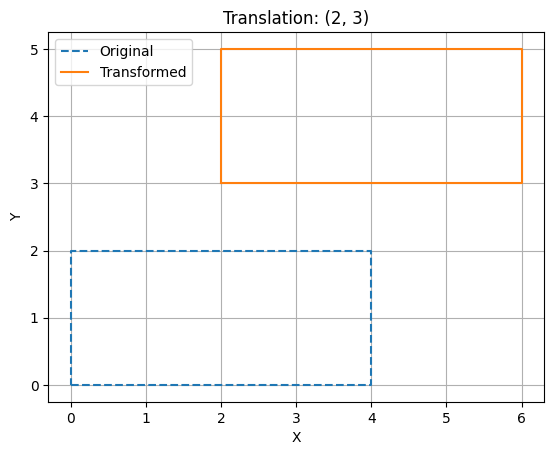

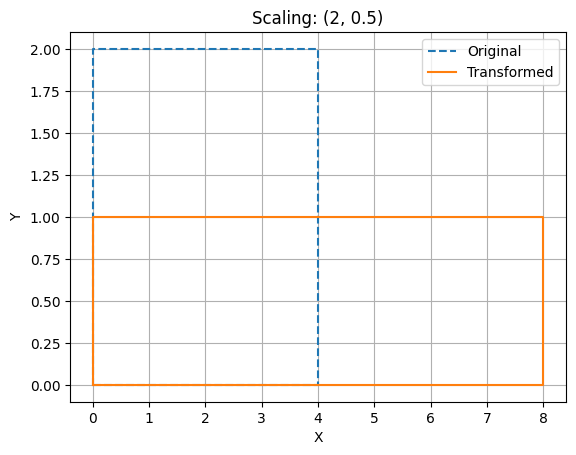

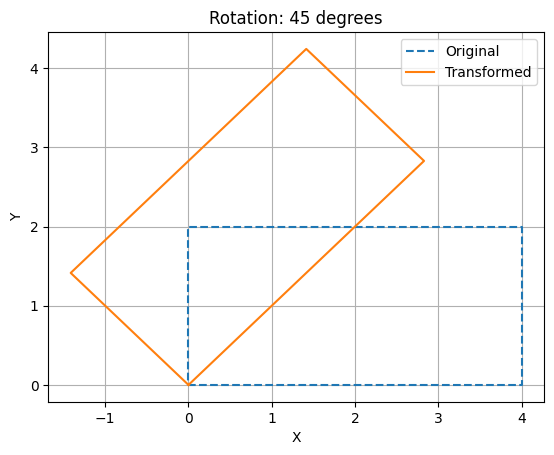

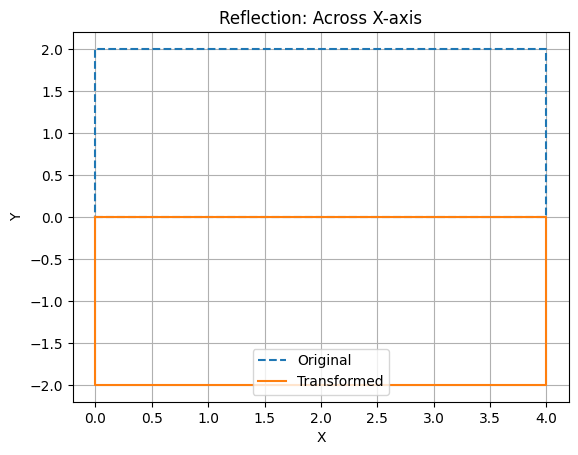

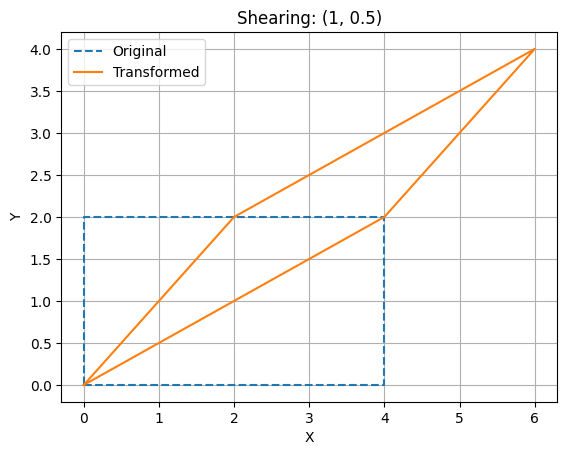

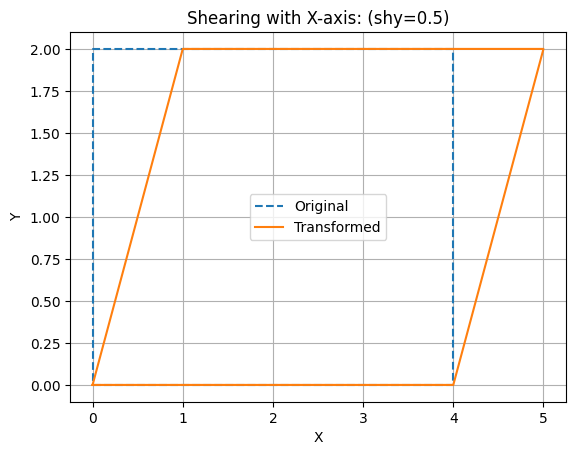

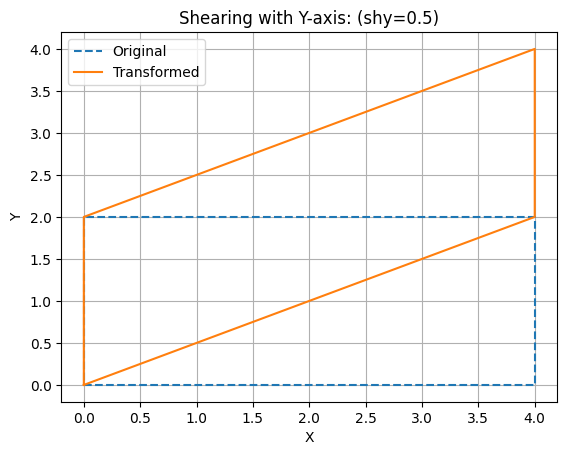

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

rectangle = np.array([
    [0, 0],
    [4, 0],
    [4, 2],
    [0, 2],
    [0, 0]
])

# Transformation Functions

def translate(points, tx, ty):
    translation_matrix = np.array([tx, ty])
    return points + translation_matrix

def scale(points, sx, sy):
    scaling_matrix = np.array([[sx, 0], [0, sy]])
    return points @ scaling_matrix.T

def rotate(points, theta):
    theta = np.radians(theta)
    rotation_matrix = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta),  np.cos(theta)]
    ])
    return points @ rotation_matrix.T

def reflect_x(points):
    reflection_matrix = np.array([[1, 0], [0, -1]])
    return points @ reflection_matrix.T

def shear(points, shx, shy):
    shearing_matrix = np.array([[1, shx], [shy, 1]])
    return points @ shearing_matrix.T

def shear_x(points, shx):
    shearing_matrix = np.array([[1, shx], [0, 1]])
    return points @ shearing_matrix.T

def shear_y(points, shy):
    shearing_matrix = np.array([[1, 0], [shy, 1]])
    return points @ shearing_matrix.T

# Plotting Function
def plot_object(original, transformed, title):
    plt.figure()
    plt.plot(original[:, 0], original[:, 1], label="Original", linestyle='--')
    plt.plot(transformed[:, 0], transformed[:, 1], label="Transformed")
    plt.title(title)
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid()
    plt.show()

# Apply Transformations
# 1. Translation
translated_rectangle = translate(rectangle, 2, 3)
plot_object(rectangle, translated_rectangle, "Translation: (2, 3)")

# 2. Scaling
scaled_rectangle = scale(rectangle, 2, 0.5)
plot_object(rectangle, scaled_rectangle, "Scaling: (2, 0.5)")

# 3. Rotation
rotated_rectangle = rotate(rectangle, 45)
plot_object(rectangle, rotated_rectangle, "Rotation: 45 degrees")

# 4. Reflection (across X-axis)
reflected_rectangle = reflect_x(rectangle)
plot_object(rectangle, reflected_rectangle, "Reflection: Across X-axis")

# 5. Shearing
sheared_rectangle = shear(rectangle, 1, 0.5)
plot_object(rectangle, sheared_rectangle, "Shearing: (1, 0.5)")

sheared_x_rectangle = shear_x(rectangle, 0.5)
plot_object(rectangle, sheared_x_rectangle, "Shearing with X-axis: (shy=0.5)")

sheared_y_rectangle = shear_y(rectangle, 0.5)
plot_object(rectangle, sheared_y_rectangle, "Shearing with Y-axis: (shy=0.5)")

plt.tight_layout()
plt.show()


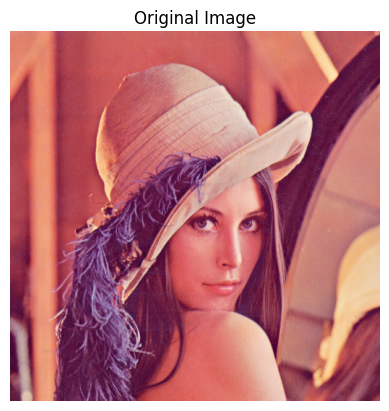

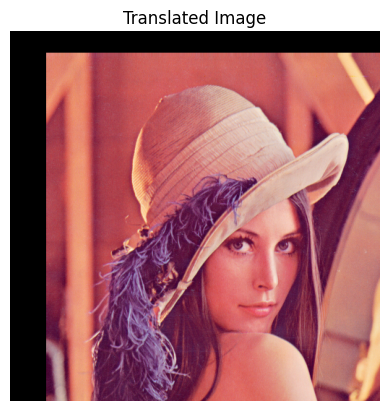

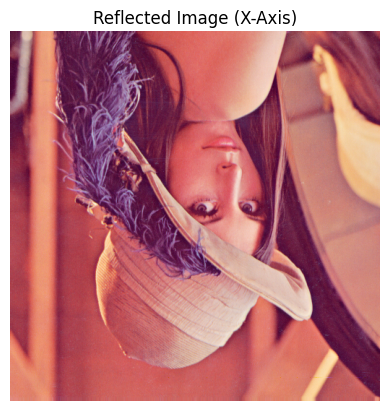

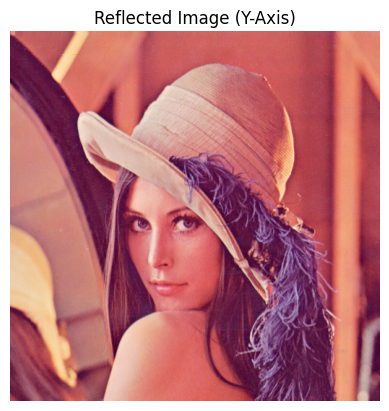

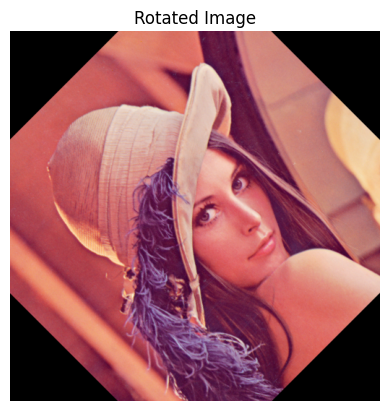

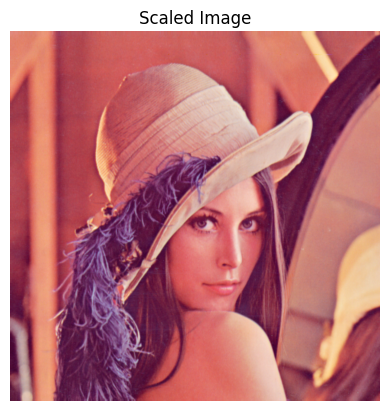

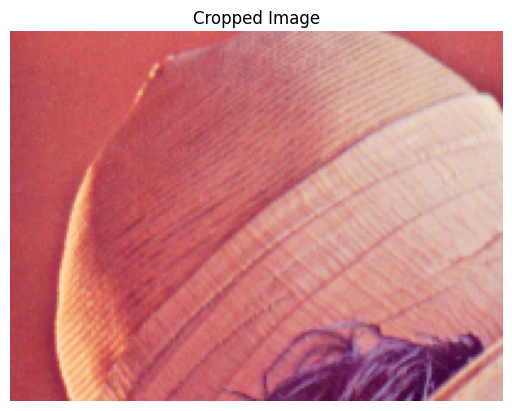

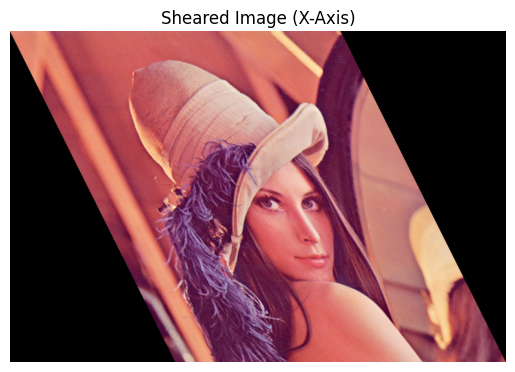

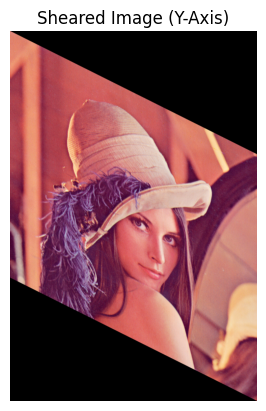

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_image(image, title="Image"):
    """Display an image using Matplotlib."""
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load an image
image = cv2.imread("Lena_Image.png")  # Replace with your image path
display_image(image, "Original Image")

# Get image dimensions
(h, w) = image.shape[:2]

# 1. Image Translation
tx, ty = 50, 30  # Translate by 50 pixels right, 30 pixels down
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
translated_image = cv2.warpAffine(image, translation_matrix, (w, h))
display_image(translated_image, "Translated Image")

# 2. Image Reflection
reflected_image_x = cv2.flip(image, 0)  # Reflect across the x-axis
display_image(reflected_image_x, "Reflected Image (X-Axis)")

reflected_image_y = cv2.flip(image, 1)  # Reflect across the y-axis
display_image(reflected_image_y, "Reflected Image (Y-Axis)")

# 3. Image Rotation
angle = 45  # Rotate 45 degrees
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))
display_image(rotated_image, "Rotated Image")

# 4. Image Scaling
scaling_factor_x, scaling_factor_y = 1.5, 1.5
scaled_image = cv2.resize(image, None, fx=scaling_factor_x, fy=scaling_factor_y, interpolation=cv2.INTER_LINEAR)
display_image(scaled_image, "Scaled Image")

# 5. Image Cropping
cropped_image = image[50:200, 100:300]  # Crop from (100, 50) to (300, 200)
display_image(cropped_image, "Cropped Image")

# 6. Shearing in x-axis
shear_x = 0.5
shearing_matrix_x = np.float32([[1, shear_x, 0], [0, 1, 0]])
sheared_image_x = cv2.warpAffine(image, shearing_matrix_x, (int(w + h * shear_x), h))
display_image(sheared_image_x, "Sheared Image (X-Axis)")

# 7. Shearing in y-axis
shear_y = 0.5
shearing_matrix_y = np.float32([[1, 0, 0], [shear_y, 1, 0]])
sheared_image_y = cv2.warpAffine(image, shearing_matrix_y, (w, int(h + w * shear_y)))
display_image(sheared_image_y, "Sheared Image (Y-Axis)")
